# MNIST

In [1]:
#MODIFIED NATIONAL INSTITUTE OF STANDARDS AND TECHNOLOGY

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist


Using TensorFlow backend.


In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [6]:
x_train[0].shape

(28, 28)

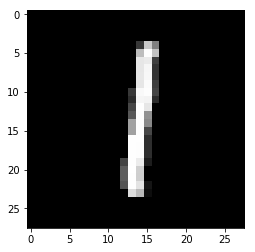

In [7]:
plt.imshow(x_train[5500],cmap='gray',interpolation='none')

In [8]:
x_test.shape

(10000, 28, 28)

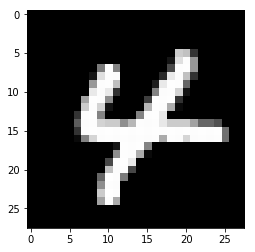

In [9]:
plt.imshow(x_test[5500],cmap='gray',interpolation='none')

In [10]:
y_train[5500]

1

In [11]:
y_test[5500]

4

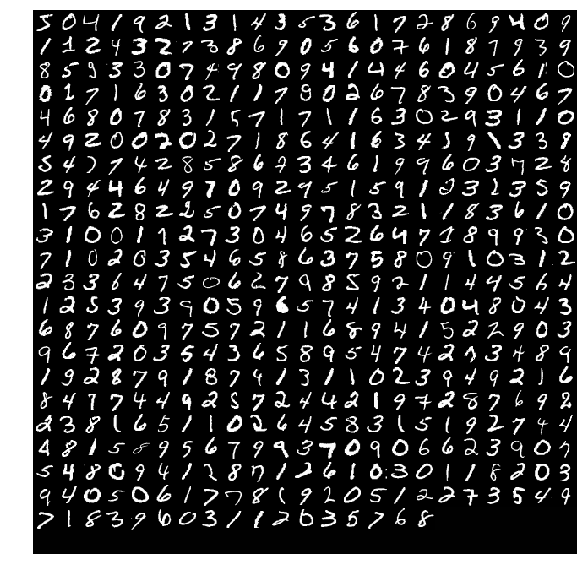

In [12]:
import vis
vis.imshow_sprite(x_train[:500])

In [13]:
28*28

784

In [14]:
print("x_train shape",x_train.shape)
print("y_train shape",y_train.shape)
print("x_test shape",x_test.shape)
print("y_test shape",y_test.shape)

x_train shape (60000, 28, 28)
y_train shape (60000,)
x_test shape (10000, 28, 28)
y_test shape (10000,)


In [15]:
x_train=x_train.reshape(60000,784)
x_test=x_test.reshape(10000,784)
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

# Normalize

In [16]:
x_train/=255
x_test/=255

# Print shape of final data

In [17]:
print("train matrix shape",x_train.shape)
print("test matrix shape",x_test.shape)

train matrix shape (60000, 784)
test matrix shape (10000, 784)


In [18]:
np.unique(y_train,return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]))

# import utils

In [19]:
from keras.utils import np_utils

# one-hot encoding

In [20]:
n_classes=10

In [21]:
y_orig = y_test
print("Shape before one-hot encoding",y_train.shape)
y_train=np_utils.to_categorical(y_train,n_classes)
y_test=np_utils.to_categorical(y_test,n_classes)
print("Shape after one-hot encoding",y_train.shape)

Shape before one-hot encoding (60000,)
Shape after one-hot encoding (60000, 10)


In [22]:
y_train[0] #5

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [23]:
y_train[5500] #1

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

# keras neural network imports

In [24]:
from keras.models import Sequential
from keras.layers.core import Dense,Activation


In [25]:
model= Sequential()
model.add(Dense(512,input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))

In [26]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
activation_1 (Activation)    (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
_________________________________________________________________
activation_2 (Activation)    (None, 10)                0         
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


# Compile

In [27]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

# train

In [28]:
history= model.fit(x_train,y_train,batch_size=10,epochs=5,validation_data=[x_test,y_test])

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 21s 351us/step - loss: 0.1797 - acc: 0.9465 - val_loss: 0.0910 - val_acc: 0.9701
Epoch 2/5
60000/60000 [==============================] - 20s 338us/step - loss: 0.0784 - acc: 0.9759 - val_loss: 0.0956 - val_acc: 0.9710
Epoch 3/5
60000/60000 [==============================] - 20s 333us/step - loss: 0.0538 - acc: 0.9828 - val_loss: 0.0669 - val_acc: 0.9794
Epoch 4/5
60000/60000 [==============================] - 20s 335us/step - loss: 0.0413 - acc: 0.9864 - val_loss: 0.0740 - val_acc: 0.9801
Epoch 5/5
60000/60000 [==============================] - 20s 336us/step - loss: 0.0343 - acc: 0.9888 - val_loss: 0.0839 - val_acc: 0.9798


# Lets predict

In [29]:
y_pred= model.predict_classes(x_test)

In [30]:
y_pred.shape

(10000,)

In [31]:
x_temp= x_test[5500].reshape(28,28)

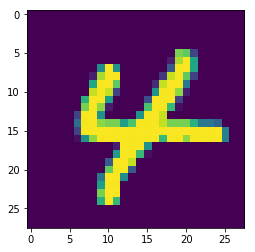

In [32]:
plt.imshow(x_temp)

In [42]:
y_pred[5500]

4

In [ ]:
#to which tested inputs were detected wrong

In [43]:
i_i = np.nonzero(y_pred != y_orig)[0]

In [44]:
len(i_i)

202

In [45]:
i_i

array([ 115,  119,  247,  321,  445,  495,  582,  684,  691,  720,  740,
        846,  874,  881,  883,  947,  951,  956, 1014, 1039, 1101, 1112,
       1156, 1181, 1194, 1226, 1242, 1247, 1260, 1319, 1328, 1378, 1393,
       1395, 1444, 1495, 1522, 1530, 1549, 1553, 1569, 1581, 1621, 1670,
       1681, 1751, 1754, 1790, 1800, 1878, 1901, 1941, 1952, 2004, 2016,
       2018, 2024, 2070, 2118, 2135, 2182, 2224, 2237, 2293, 2325, 2369,
       2387, 2406, 2408, 2414, 2422, 2488, 2578, 2597, 2607, 2654, 2720,
       2760, 2771, 2810, 2863, 2921, 2927, 2939, 2953, 3005, 3060, 3073,
       3115, 3289, 3333, 3384, 3422, 3451, 3475, 3503, 3520, 3549, 3558,
       3597, 3727, 3749, 3751, 3767, 3780, 3808, 3818, 3869, 3876, 3906,
       3926, 3941, 3985, 4065, 4140, 4156, 4163, 4176, 4199, 4248, 4265,
       4271, 4289, 4294, 4360, 4369, 4384, 4433, 4437, 4443, 4497, 4571,
       4601, 4639, 4731, 4761, 4823, 4833, 4879, 4956, 5067, 5634, 5642,
       5676, 5749, 5887, 5926, 5937, 5972, 5973, 59

In [46]:
y_pred[115], y_test[115]

(9, array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32))